## <u>EJERCICIO 1</u>
### **REGRESION LINEAL MULTIPLE**

### PASO 0 - Importo las librerias

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import numpy as np

### PASO 1 - Cargo el dataframe

In [2]:
dataframe = pd.read_csv("advertising.csv", encoding="ISO-8859-1")
dataframe

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# Creo una copia para trabajar
dataset = dataframe.copy()

# Elimino los posibles errores NaN
dataset = dataset.dropna()

dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### PASO 2 - Grafico de dispersion - Indices y Sales

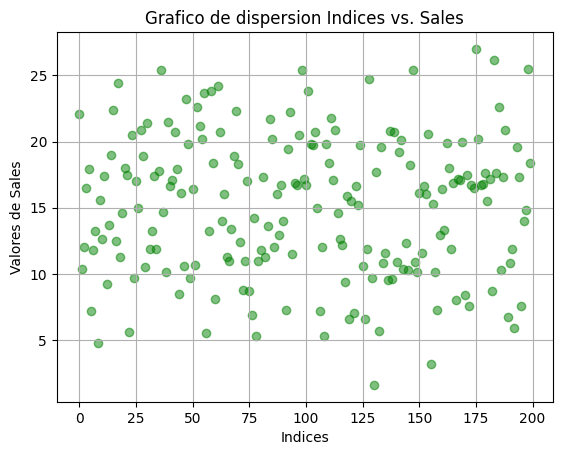

In [4]:
x = np.arange(len(dataset))
y = dataset["Sales"]

plt.figure()
plt.scatter(x, y, color="green", alpha=0.5)

plt.title("Grafico de dispersion Indices vs. Sales")
plt.xlabel("Indices")
plt.ylabel("Valores de Sales")
plt.grid()
plt.show()

### PASO 3 - Divido datos de entrenamiento y de test

In [5]:
# Separo los datos de entrada y de salida (labels)
data_x = dataset.copy()
data_y = dataset.pop("Sales")
data_x.pop("Sales")

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [6]:
# Estadisticas generales
estadisticas = data_x.describe()
estadisticas = estadisticas.transpose()
estadisticas

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0


In [7]:
x_entrenar, x_test, y_entrenar, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=9, shuffle=True)

print("Porcentaje de datos de entrenamiento:", len(x_entrenar)*100/(len(x_entrenar)+len(x_test)))
print("Porcentaje de datos de test_________:", len(x_test)*100/(len(x_entrenar)+len(x_test)))

print(x_entrenar.shape)
print(y_entrenar.shape)

Porcentaje de datos de entrenamiento: 70.0
Porcentaje de datos de test_________: 30.0
(140, 3)
(140,)


### PASO 4 - Determinacion del modelo de regresion lineal multiple

In [8]:
# Instancio la clase LinearRegression para entrenar el modelo
regresion_lineal = linear_model.LinearRegression()

regresion_lineal.fit(x_entrenar, y_entrenar)

# Uso la instancia regresion_lineal para testear el modelo
y_prediccion = regresion_lineal.predict(x_test)

### PASO 5 - Evaluo el desempeño del modelo

In [9]:
# Evaluo la regresion linear con los valores de testeo

print("Error absoluto medio =", round(sm.mean_absolute_error(y_test, y_prediccion), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(y_test, y_prediccion), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(y_test, y_prediccion), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(y_test, y_prediccion), 2)) 
print("Puntuación R2 =", round(sm.r2_score(y_test, y_prediccion), 2))

Error absoluto medio = 1.13
Error cuadratico medio = 2.11
Error absoluto mediano = 0.81
Puntuación de varianza explicada = 0.92
Puntuación R2 = 0.92


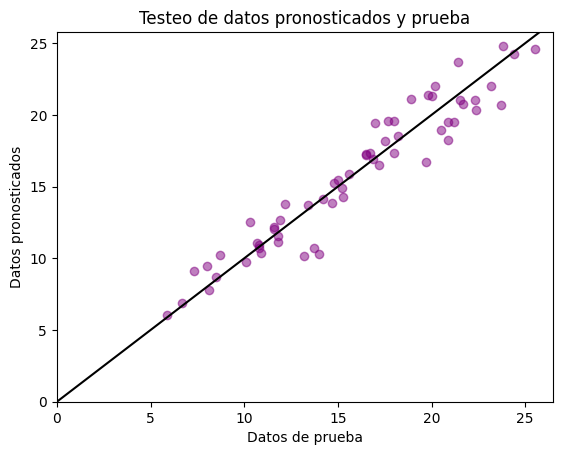

In [10]:
# Grafico los valores de resultado reales de testeo con los de prediccion de testeo

plt.figure()
plt.scatter(y_test, y_prediccion, color="purple", alpha=0.5)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 30], [0, 30], color="black")
plt.title("Testeo de datos pronosticados y prueba")
plt.xlabel("Datos de prueba")
plt.ylabel("Datos pronosticados")
plt.show()

In [11]:
# Calculo el error porcentual de cada valor

def error_porcentual(y_test, y_pred):
	return abs((y_test - y_pred) / y_test) * 100

porc_error = error_porcentual(y_test, y_prediccion)
porc_error.head()

84     4.211470
60     3.950724
54     8.884747
109    7.943480
156    6.480104
Name: Sales, dtype: float64

Text(0, 0.5, 'Errores porcentuales')

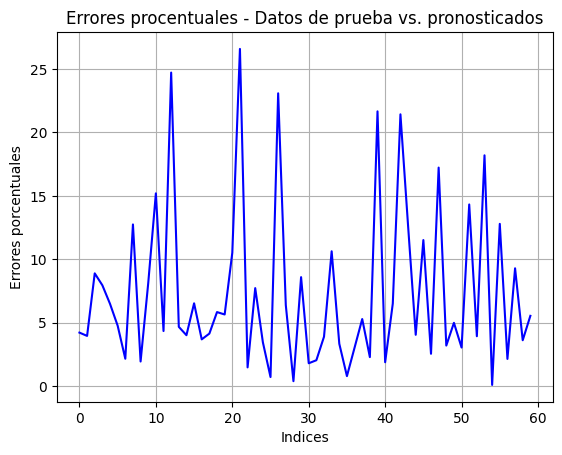

In [12]:
# Grafico los errores porcentuales

x = np.arange(len(porc_error))

plt.figure()
plt.plot(x, porc_error, color="blue")
plt.grid()

plt.title("Errores procentuales - Datos de prueba vs. pronosticados")
plt.xlabel("Indices")
plt.ylabel("Errores porcentuales")

# plt.show()


In [13]:
# Calculo el valor maximo de los errores porcentuales

print(max(porc_error))

26.58770615488924


In [14]:
# Calculo el error porcentual promedio

porcentaje_error = sm.mean_absolute_percentage_error(y_test, y_prediccion)
porcentaje_error

0.0737222320265699

### PASO 6 - Conclusiones
Luego de algunas pruebas llego a la conclusion que con un train split de 70/30 se logra entrenar muy bien al modelo y logro una puntuacion R2 de 0.92. Se puede ver esto reflejado en el grafico de testeo vs predichas que se concentran los punto al rededor de la recta de valores optimos. Y el porcentaje de error logrado esta por debajo del 30%.


